## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Avaliação de Agrupamento de Dados - Demo 4

* Utilização do algoritmo K-means com diferentes parâmetros.
* Base de dados sintéticas
* Comparação dos diferentes grupos de um mesmo agrupamento através do método Silhouette Analysis.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


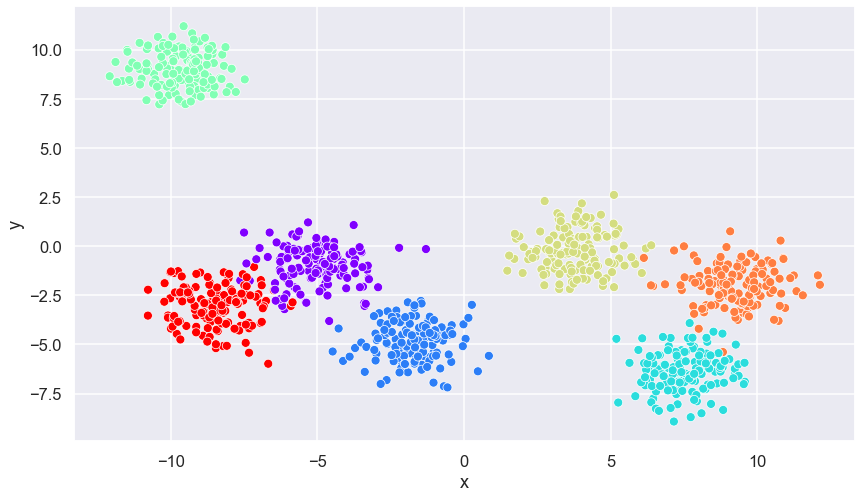

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Testar K-Means

In [5]:
def train_and_plot_with_silhouette(data, k=3, init='k-means++', n_init=10, max_iter=300,
                                   precompute_distances='auto', algorithm='auto', verbose=0, random_state=133):
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   precompute_distances=precompute_distances, algorithm=algorithm,
                   random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    plot_silhouette(data_copy, model)
    
    return model, model.labels_

def plot_silhouette(data, model):
    """
    Method from Scikit-learn with some changes.
    Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    k = model.n_clusters
    cluster_labels = model.labels_
    centroids = model.cluster_centers_
    X = data.values
    
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('Para K =', k,
          'o Silhouette Score médio é:', silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('O Silhouette Plot para vários grupos.')
    ax1.set_xlabel('Os valores do Silhouette Coefficient')
    ax1.set_ylabel('Cluster')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centroids):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title('Visualização dos dados clusterizados.')

    plt.suptitle(('Silhouette Analysis do KMeans '
                  'K = %d' % k),
                 fontsize=14, fontweight='bold')

    plt.show()

### Exemplo de Índice Interno

#### Silhouette Coefficient

Com número correto de clusters, onde grupos resultantes são bastante similares ao ground truth.

Para K = 7 o Silhouette Score médio é: 0.6478900968149082


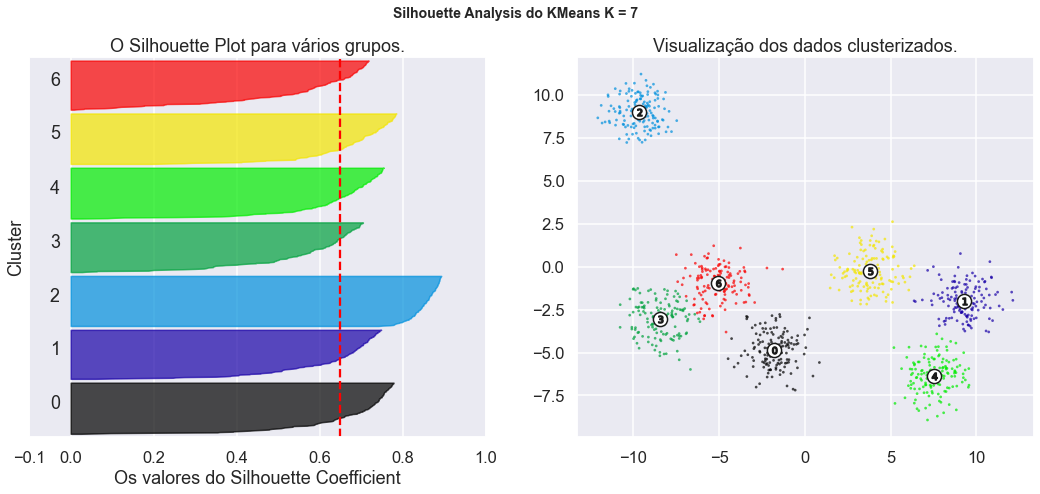

In [6]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=7)

Com inicialização aleatória, onde grupos resultantes são menos similares ao ground truth.

Para K = 7 o Silhouette Score médio é: 0.5844770847153654


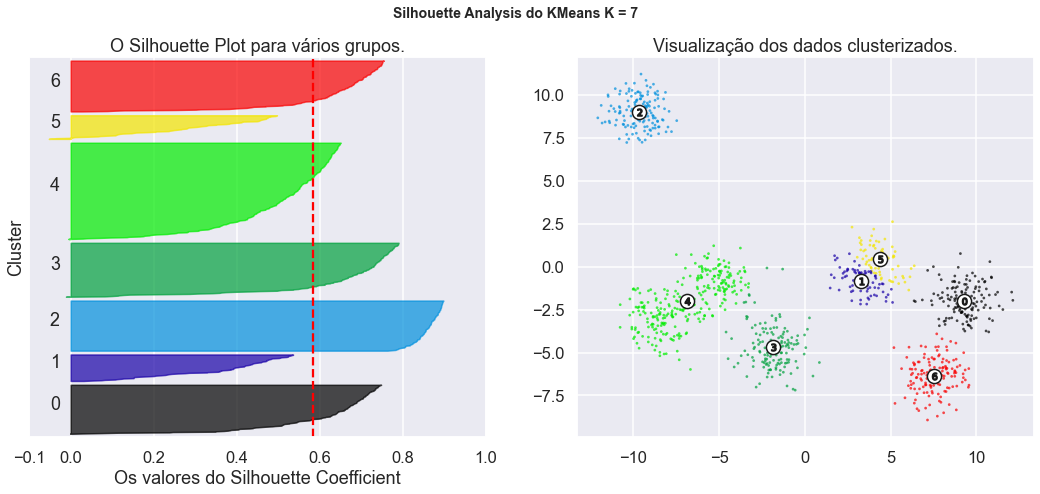

In [7]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=7, init='random', random_state=400)

Com número de grupos incorreto, onde a quantidade de grupos resultantes é menor do que a quantidade de grupos real.

Para K = 3 o Silhouette Score médio é: 0.6411375499729021


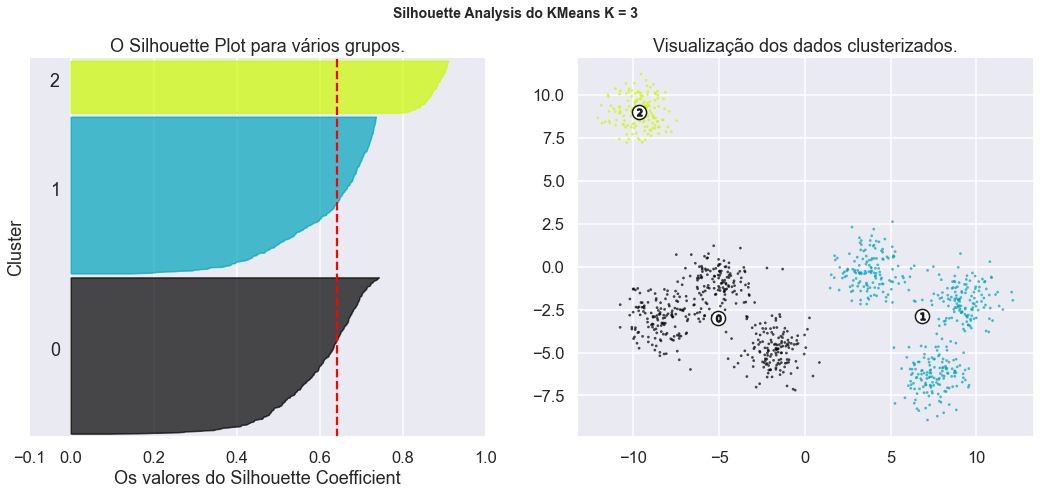

In [8]:
_, clusters_labels = train_and_plot_with_silhouette(df, k=3)

Com número de grupos incorreto, onde a quantidade de grupos resultantes é maior do que a quantidade de grupos real.

Para K = 30 o Silhouette Score médio é: 0.3511994090105848


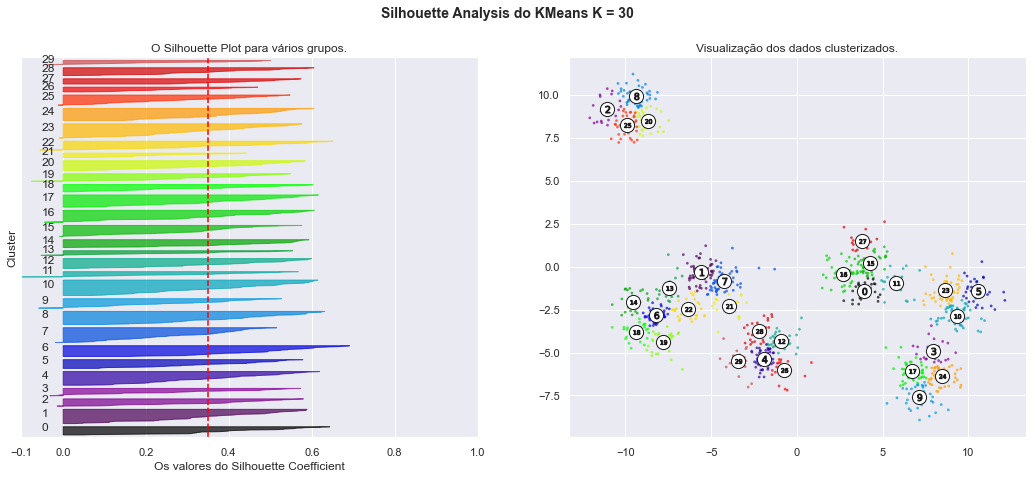

In [9]:
sns.set(style='darkgrid')
_, clusters_labels = train_and_plot_with_silhouette(df, k=30)

## Algumas limitações
Resultados da avaliação de execuções onde o K-means é limitado.

In [10]:
sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

In [11]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


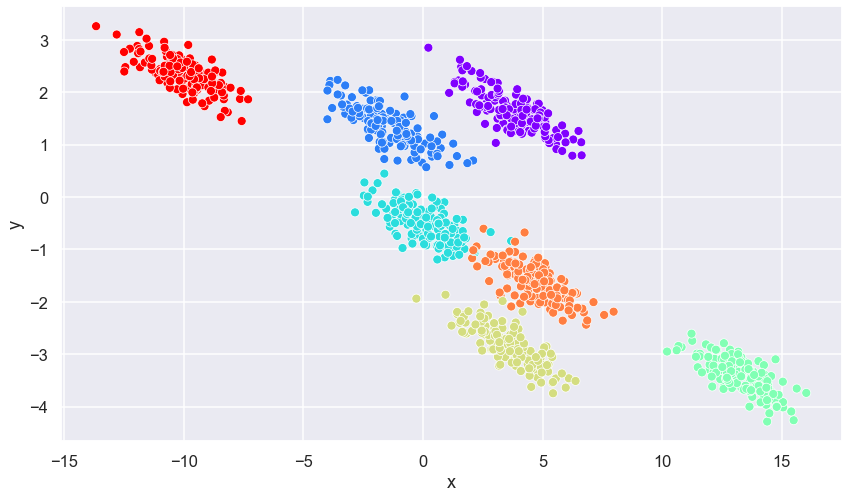

In [12]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

Para K = 7 o Silhouette Score médio é: 0.5740425466976434


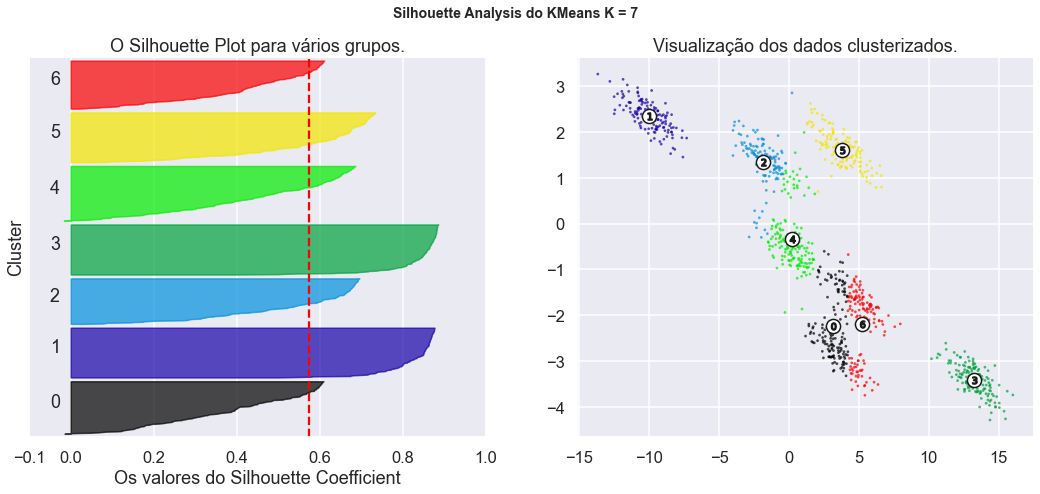

In [13]:
_, clusters_labels = train_and_plot_with_silhouette(df_transformed, k=7)

### Avaliando em bases de dados com formatos diferentes de grupos

In [14]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


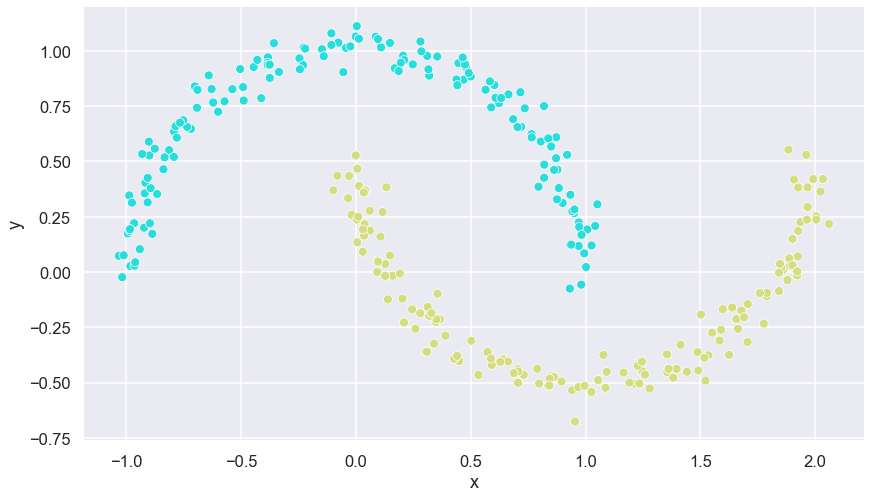

In [15]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

Para K = 2 o Silhouette Score médio é: 0.4915067777320047


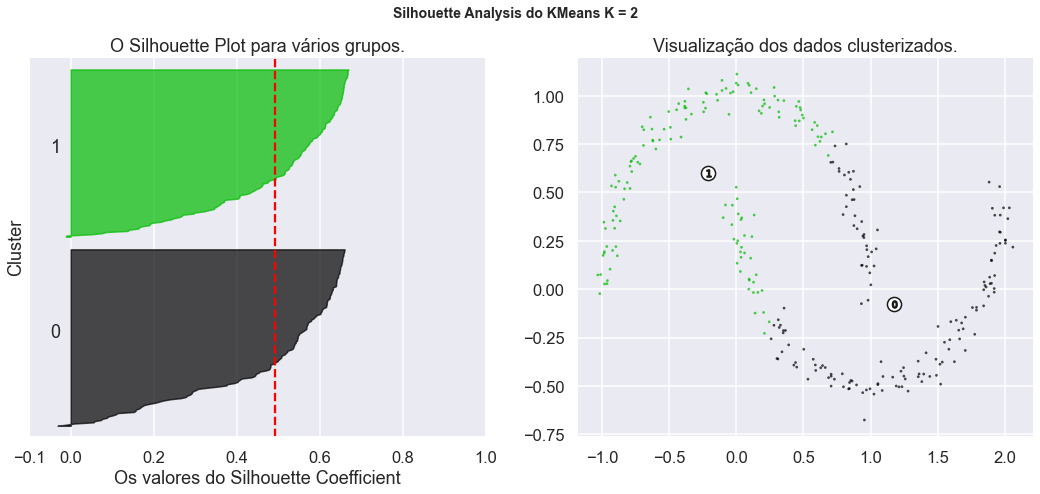

In [16]:
_, clusters_labels = train_and_plot_with_silhouette(df_moon, k=2)

### Base de dados com ruído/aleatória

In [17]:
# Criamos uma base de dados com 1000 instâncias e duas features
random_data = np.random.rand(500, 2)

df_random = pd.DataFrame(random_data, columns=['x', 'y'])
df_random['label'] = None
df_random.head()

,x,y,label
0,0.618506,0.292661,None
1,0.833654,0.351793,None
2,0.980241,0.360629,None
3,0.278535,0.514764,None
4,0.784915,0.210199,None


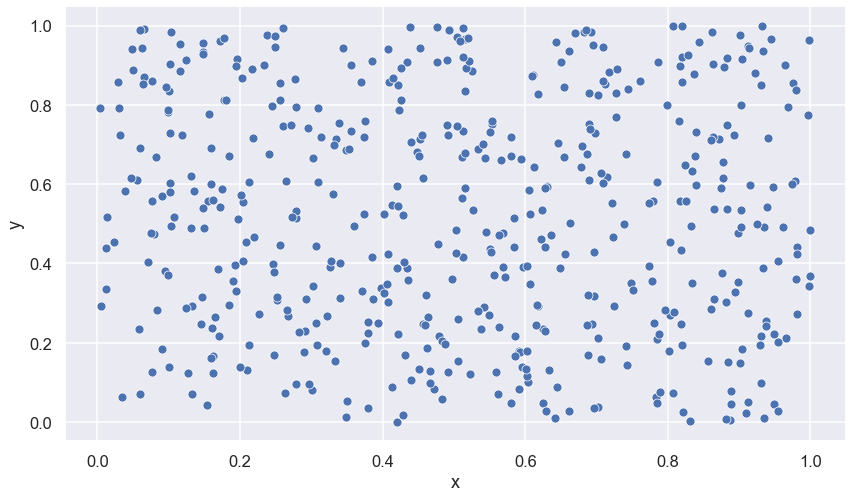

In [18]:
_ = sns.scatterplot(x='x', y='y', data=df_random, legend=False)

Para K = 2 o Silhouette Score médio é: 0.3660216265021604


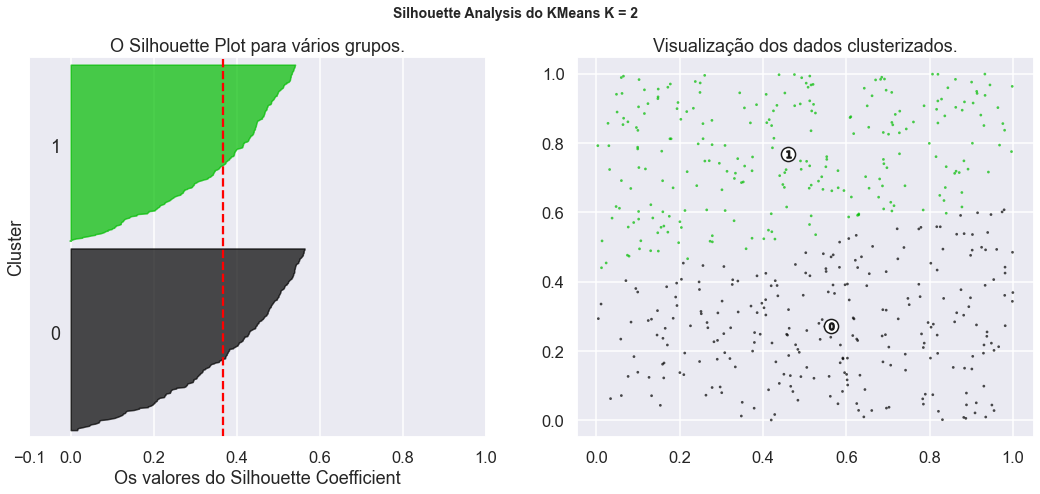

In [19]:
_, clusters_labels = train_and_plot_with_silhouette(df_random, k=2)